In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import itertools

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from IPython.display import Image
from IPython import display
import matplotlib.pyplot as plt

%matplotlib inline

# 1. Preprocessing

### pandas로 읽어오기

In [3]:
data = pd.read_csv("./sample_data.txt", sep= '\t')
data

,label,meastime,stage,degc,0 Hz,1 Hz,2 Hz,3 Hz,4 Hz,5 Hz,...,9991 Hz,9992 Hz,9993 Hz,9994 Hz,9995 Hz,9996 Hz,9997 Hz,9998 Hz,9999 Hz,10000 Hz
0,0,20200408132629,s1,60.8,3.337466e-15,6.813422e-15,7.246523e-15,8.078009e-15,9.321475e-15,1.169665e-14,...,1.470507e-06,1.227576e-06,8.681997e-07,6.773161e-07,3.666906e-07,1.733466e-07,4.257153e-07,1.146287e-06,2.315876e-06,8.365001e-06
1,0,20200422112911,s7,71.1,3.518254e-14,7.266183e-14,7.994039e-14,9.354825e-14,1.156408e-13,1.538780e-13,...,1.396176e-06,2.875137e-06,1.420636e-06,1.391422e-06,1.892279e-06,3.798289e-06,3.971005e-06,3.528786e-06,1.125920e-05,8.634675e-05
2,0,20200417151032,s2,49.6,3.963802e-15,8.343728e-15,9.659595e-15,1.208021e-14,1.604541e-14,2.275951e-14,...,6.257802e-08,9.304342e-08,6.333435e-08,2.357872e-07,4.400379e-07,2.393002e-06,3.405056e-06,9.397469e-07,2.325818e-06,1.280774e-06
3,0,20200422150542,s6,53.5,7.786948e-15,1.609174e-14,1.774796e-14,2.082929e-14,2.614301e-14,3.435657e-14,...,4.884777e-07,4.677642e-07,2.229568e-06,3.888228e-06,1.698461e-05,1.836729e-05,4.214171e-06,1.012343e-05,3.617143e-06,6.269778e-07
4,0,20200408085215,s4,63.9,2.142766e-14,4.349323e-14,4.547246e-14,4.902936e-14,5.487627e-14,6.301525e-14,...,5.531142e-07,2.072130e-06,4.804855e-06,3.355894e-05,6.870571e-05,5.572402e-05,4.573358e-05,8.669402e-06,7.253392e-06,2.876429e-06
5,0,20200401191456,s4,65.7,2.843588e-14,5.801749e-14,6.162536e-14,6.824914e-14,7.935923e-14,9.583618e-14,...,5.749289e-07,1.237595e-06,2.035427e-06,3.650389e-06,2.307347e-06,1.587144e-06,1.847724e-06,2.877964e-06,1.431568e-06,8.458068e-07
6,0,20200408102603,s8,64.6,8.259474e-14,1.702583e-13,1.863012e-13,2.160825e-13,2.634671e-13,3.383763e-13,...,6.412776e-06,4.315448e-06,1.264098e-05,3.491533e-06,5.281232e-07,6.817123e-07,5.579179e-07,8.248013e-07,3.683016e-07,6.676920e-07
7,0,20200416164405,s7,64.7,2.524975e-15,5.348803e-15,6.297586e-15,8.035920e-15,1.081191e-14,1.561049e-14,...,1.000111e-07,1.580460e-07,6.672723e-08,1.164466e-07,1.556111e-07,1.806838e-07,3.742918e-07,9.549482e-07,6.392315e-06,1.158501e-05
8,1,20200408113925,s5,66.6,2.519073e-14,5.163043e-14,5.555720e-14,6.280223e-14,7.374439e-14,9.363082e-14,...,4.829257e-07,5.904012e-07,6.122929e-07,3.724896e-07,5.890676e-07,1.067424e-06,5.973574e-06,1.412959e-05,2.751901e-05,1.315984e-05
9,1,20200417192412,s5,62.2,1.464507e-14,3.071371e-14,3.522177e-14,4.360136e-14,5.732303e-14,8.108217e-14,...,7.710664e-07,6.492042e-07,8.085241e-07,5.665101e-07,1.844271e-06,5.445187e-06,4.123601e-05,6.119383e-05,2.029021e-05,3.086149e-05


### read by f.readline()

In [3]:
datas = []
file = "./sample_data.txt"
with open(file, "r") as f:
    header = f.readline()
    while 1:
        line = f.readline()
        if not line:
            break
        tmp = line.strip().split('\t')
        freq = list(map(float, tmp[4:10004]))
        label = int(tmp[0])
#         label = tmp[0]
        datas.append([freq,label])

# data = np.array(data)

# X = data[:, 1:]
# y = np.int32(data[:, 0])


In [4]:
datas[0]

[[3.337466e-15,
  6.813422e-15,
  7.246523e-15,
  8.078009e-15,
  9.321475e-15,
  1.169665e-14,
  1.689652e-14,
  3.426311e-14,
  2.184865e-13,
  7.629563e-13,
  1.653863e-12,
  4.362379e-12,
  2.057659e-11,
  5.036245e-11,
  4.305094e-10,
  2.265402e-09,
  3.451754e-09,
  1.151823e-08,
  1.308171e-07,
  4.840885e-07,
  7.378081e-07,
  9.258488e-07,
  5.113009e-07,
  3.184496e-07,
  3.499113e-07,
  2.276449e-07,
  1.972781e-07,
  1.127449e-07,
  1.032608e-07,
  6.103796e-08,
  6.703937e-08,
  4.467191e-08,
  1.560241e-06,
  7.369756e-06,
  2.326945e-06,
  2.102179e-07,
  1.996969e-07,
  9.543591e-08,
  1.620767e-07,
  3.572845e-07,
  3.443696e-07,
  2.534274e-07,
  2.739568e-07,
  1.888268e-07,
  1.273299e-07,
  1.248497e-07,
  1.17615e-07,
  1.855252e-07,
  3.928762e-07,
  6.09079e-07,
  0.000104,
  0.000488,
  0.000165,
  1.503836e-06,
  9.422837e-07,
  2.498724e-06,
  1.367512e-06,
  6.336234e-07,
  4.118464e-07,
  1.016341e-06,
  1.328514e-06,
  4.119505e-07,
  6.652514e-07,
  4.43

### Augmentation - SMOTE

In [5]:
# serialize before SMOTE
# specs = np.array(spectrum)
# labels = np.array(labels)

### SMOTE를 위해 축 변환

In [50]:
datas_t = np.transpose(datas)
freq = datas_t[0].tolist()
label = datas_t[1].tolist()

In [51]:
from imblearn.over_sampling import SMOTE
datas_smote = []
sm = SMOTE(random_state=0, k_neighbors=1) #k_neighbors 옵션 제거
freq_smote, label_smote = sm.fit_sample(freq, label)

In [64]:
freq_l = freq_smote.ravel()
label_l = label_smote.ravel()

In [65]:
freq_l

array([3.33746600e-15, 6.81342200e-15, 7.24652300e-15, ...,
       7.25491358e-06, 1.58397746e-05, 2.72563354e-05])

[[3.518254e-14,
  7.266183e-14,
  7.994039e-14,
  9.354825e-14,
  1.156408e-13,
  1.53878e-13,
  2.257304e-13,
  3.133745e-13,
  1.042533e-12,
  3.635461e-12,
  1.079548e-11,
  5.230238e-11,
  6.539668e-10,
  2.12537e-09,
  4.91665e-09,
  9.399429e-09,
  2.829774e-08,
  1.408124e-07,
  7.048988e-07,
  3.727397e-06,
  7.41604e-06,
  5.296426e-06,
  3.567053e-06,
  5.706382e-06,
  4.839805e-06,
  3.247569e-06,
  1.734894e-06,
  1.763234e-06,
  1.401657e-06,
  6.254386e-07,
  8.173483e-07,
  6.717507e-07,
  5.196154e-07,
  9.565832e-07,
  6.404227e-07,
  5.171717e-07,
  6.746655e-07,
  8.149293e-07,
  1.308482e-06,
  8.16034e-07,
  7.722199e-07,
  7.997179e-07,
  5.914159e-07,
  4.509434e-07,
  4.311401e-07,
  7.944112e-07,
  8.588498e-07,
  9.962368e-07,
  2.841063e-06,
  6.084788e-06,
  0.000164,
  0.000915,
  0.000327,
  4.162446e-06,
  4.744068e-06,
  1.139652e-05,
  1.616272e-05,
  1.017067e-05,
  6.093797e-06,
  4.667856e-06,
  3.728596e-06,
  3.503914e-06,
  3.49592e-06,
  2.488421

### 다시 축변환

In [59]:
datas_smote

[array([[3.33746600e-15, 6.81342200e-15, 7.24652300e-15, ...,
         4.25715300e-07, 1.14628700e-06, 2.31587600e-06],
        [3.51825400e-14, 7.26618300e-14, 7.99403900e-14, ...,
         3.97100500e-06, 3.52878600e-06, 1.12592000e-05],
        [3.96380200e-15, 8.34372800e-15, 9.65959500e-15, ...,
         3.40505600e-06, 9.39746900e-07, 2.32581800e-06],
        ...,
        [2.05760840e-14, 4.24775408e-14, 4.66586759e-14, ...,
         2.14039650e-05, 3.47242995e-05, 2.43557796e-05],
        [2.40494049e-14, 4.93666762e-14, 5.33563574e-14, ...,
         9.78992163e-06, 1.92232115e-05, 2.67366587e-05],
        [2.48075298e-14, 5.08703741e-14, 5.48182666e-14, ...,
         7.25491358e-06, 1.58397746e-05, 2.72563354e-05]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])]

In [70]:
# freq = np.array(freq_smote)
# label = np.array(label_smote)
f = np.transpose(freq)
l = np.transpose(label)
datas_smote = [freq_smote, label_smote]
# len(datas_smote[0])
# datas = np.transpose(datas_smote)
# np.swapaxes(datas_smote, 0, 1)

In [72]:
l

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

# 2. Spectrogram

In [5]:
datas[0][0]

[3.337466e-15,
 6.813422e-15,
 7.246523e-15,
 8.078009e-15,
 9.321475e-15,
 1.169665e-14,
 1.689652e-14,
 3.426311e-14,
 2.184865e-13,
 7.629563e-13,
 1.653863e-12,
 4.362379e-12,
 2.057659e-11,
 5.036245e-11,
 4.305094e-10,
 2.265402e-09,
 3.451754e-09,
 1.151823e-08,
 1.308171e-07,
 4.840885e-07,
 7.378081e-07,
 9.258488e-07,
 5.113009e-07,
 3.184496e-07,
 3.499113e-07,
 2.276449e-07,
 1.972781e-07,
 1.127449e-07,
 1.032608e-07,
 6.103796e-08,
 6.703937e-08,
 4.467191e-08,
 1.560241e-06,
 7.369756e-06,
 2.326945e-06,
 2.102179e-07,
 1.996969e-07,
 9.543591e-08,
 1.620767e-07,
 3.572845e-07,
 3.443696e-07,
 2.534274e-07,
 2.739568e-07,
 1.888268e-07,
 1.273299e-07,
 1.248497e-07,
 1.17615e-07,
 1.855252e-07,
 3.928762e-07,
 6.09079e-07,
 0.000104,
 0.000488,
 0.000165,
 1.503836e-06,
 9.422837e-07,
 2.498724e-06,
 1.367512e-06,
 6.336234e-07,
 4.118464e-07,
 1.016341e-06,
 1.328514e-06,
 4.119505e-07,
 6.652514e-07,
 4.435842e-07,
 1.929566e-07,
 3.273756e-07,
 3.391191e-07,
 7.163151

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Only one segment is calculated since parameter NFFT (=10000) >= signal length (=10000).
  after removing the cwd from sys.path.


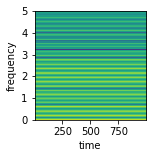

In [5]:
# test로 spectrogram 생성
plt.rcParams["figure.figsize"] = (2,2)
# plt.specgram(list(specs[15]), NFFT=10000, Fs=10, noverlap=5, detrend='mean', mode='psd')
plt.specgram(list(datas[0][0]), NFFT=10000, Fs=10, noverlap=5, detrend='mean', mode='psd')
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

In [6]:
# Input : numpy array
# Output : spectrogram numpy array

def spec_array(arr):
    plt.axis('off') # "invisable" axis in plot
    plt.xticks([]), plt.yticks([])
    plt.use_sticky_edges = True
    plt.margins(0)
    plt.rcParams["figure.figsize"] = (2,2)
    plt.specgram(list(arr), NFFT=10000, Fs=10, noverlap=5, detrend='mean', mode='psd')
    fig = plt.figure(1, tight_layout=True)
    fig.canvas.draw()
    fig.tight_layout(pad=0)
#     plt.close()
    
    # Now we can save it to a numpy array.
    data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
#     return np.array(fig.canvas.renderer._renderer)
    return data
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=10000) >= signal length (=10000).
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


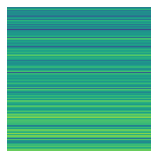

In [7]:
# spec_arr = spec_array(specs[0])
spec = spec_array(datas[2][0])
# spec_arr

NameError: name 'spec_arr' is not defined

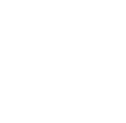

In [8]:
plt.axis('off')
plt.xticks([]), plt.yticks([])
plt.use_sticky_edges = True
plt.imshow(spec_arr)
plt.show()

# 3. Data Load

### split data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Only one segment is calculated since parameter NFFT (=10000) >= signal length (=10000).
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


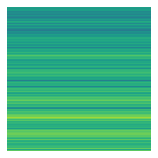

In [8]:
data = []
# for spec in specs:
#     arr = spec_array(spec)
#     data.append(arr)
for i,d in enumerate(datas):
    arr = spec_array(d[0])
    d[0] = arr # .flatten()
#     data.append(arr)

In [9]:
len(datas[4][0])
data_flat = datas[4][0] #.flatten()
len(data_flat)

144

In [10]:
# validation 참조 https://discuss.pytorch.org/t/how-to-split-dataset-into-test-and-validation-sets/33987/5
datasets = train_test_split(datas)

In [11]:
print(len(datasets[0]))
print(len(datasets[1]))

7
3


In [12]:
trainloader = torch.utils.data.DataLoader(datasets[0], batch_size=1,shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(datasets[1], batch_size=1,shuffle=False, num_workers=2)

In [8]:
labels[0]

NameError: name 'labels' is not defined

# 4. Modeling

In [84]:
# construct model on cuda if available
use_cuda = torch.cuda.is_available()

class CNNClassifier(nn.Module):
    
    def __init__(self):
        # 항상 torch.nn.Module을 상속받고 시작
        super(CNNClassifier, self).__init__()
        conv1 = nn.Conv2d(1, 6, 5, 1) # 6@24*24
        # activation ReLU
        pool1 = nn.MaxPool2d(2) # 6@12*12
        conv2 = nn.Conv2d(6, 16, 5, 1) # 16@8*8
        # activation ReLU
        pool2 = nn.MaxPool2d(2) # 16@4*4
        
        self.conv_module = nn.Sequential(
            conv1,
            nn.ReLU(),
            pool1,
            conv2,
            nn.ReLU(),
            pool2
        )
        
        fc1 = nn.Linear(16*4*4, 120)
        # activation ReLU
        fc2 = nn.Linear(120, 84)
        # activation ReLU
        fc3 = nn.Linear(84, 10)

        self.fc_module = nn.Sequential(
            fc1,
            nn.ReLU(),
            fc2,
            nn.ReLU(),
            fc3
        )
        
        # gpu로 할당
        if use_cuda:
            self.conv_module = self.conv_module.cuda()
            self.fc_module = self.fc_module.cuda()
        
    def forward(self, x):
        out = self.conv_module(x) # @16*4*4
        # make linear
        dim = 1
        for d in out.size()[1:]: #16, 4, 4
            dim = dim * d
        out = out.view(-1, dim)
        out = self.fc_module(out)
        return F.softmax(out, dim=1)

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [22]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
#         [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: Given groups=1, weight of size 6 3 5 5, expected input[1, 144, 144, 3] to have 3 channels, but got 144 channels instead

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=1, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        x = x.view(-1, 4 * 4 * 50) # [batch_size, 50, 4, 4]
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [14]:
cnn = CNN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.01)

In [15]:
cnn.train()  # 학습을 위함
for epoch in range(10):
  for index, (data, target) in enumerate(trainloader):
    optimizer.zero_grad()  # 기울기 초기화
    output = cnn(data)
    loss = criterion(output, target)
    loss.backward()  # 역전파
    optimizer.step()

    if index % 100 == 0:
      print("loss of {} epoch, {} index : {}".format(epoch, index, loss.item()))

RuntimeError: Given groups=1, weight of size 1 3 1 1, expected input[1, 144, 144, 3] to have 3 channels, but got 144 channels instead

In [ ]:
cnn.eval()  # test case 학습 방지를 위함
test_loss = 0
correct = 0
with torch.no_grad():
  for data, target in test_loader:
    output = cnn(data)
    test_loss += criterion(output, target).item() # sum up batch loss
    pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [16]:
datas[0]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  